     Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     55    28      3       7    5              2        0     0
1  Muffin     47    24     12       6    9              1        0     0
2  Muffin     47    23     18       6    4              1        0     0
3  Muffin     45    11     17      17    8              1        0     0
4  Muffin     50    25     12       6    5              2        1     0
(20, 9)
[1 0 1 0]
[[2 0]
 [0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2

    accuracy                           1.00         4
   macro avg       1.00      1.00      1.00         4
weighted avg       1.00      1.00      1.00         4



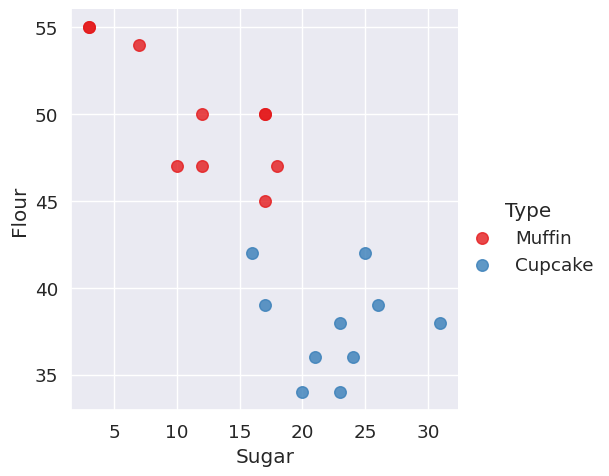

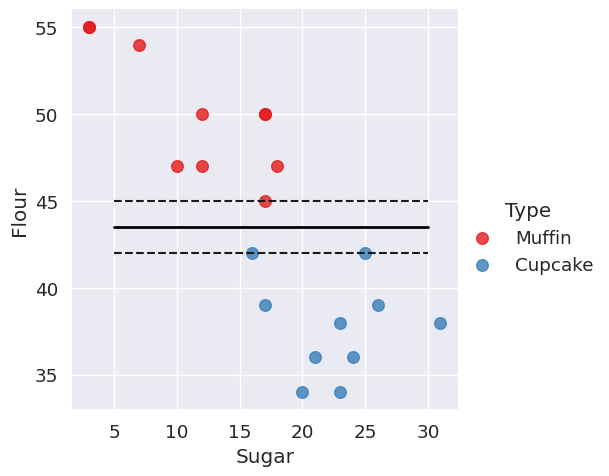

In [15]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

sns.set(font_scale=1.2)

recipes = pd.read_csv('/content/drive/MyDrive/recipes_muffins_cupcakes.csv')
print(recipes.head())
print(recipes.shape)

sns.lmplot(x='Sugar', y='Flour', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

sugar_butter = recipes[['Sugar', 'Flour']].values
type_label = np.where(recipes['Type'] == 'Muffin', 0, 1)

model = svm.SVC(kernel='linear')
model.fit(sugar_butter, type_label)

w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(5, 30)
yy = a * xx - (model.intercept_[0] / w[1])

b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])

b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

sns.lmplot(x='Sugar', y='Flour', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=80, facecolors='none')

x_train, x_test, y_train, y_test = train_test_split(sugar_butter, type_label, test_size=0.2)
model1 = svm.SVC(kernel='linear')
model1.fit(x_train, y_train)
pred = model1.predict(x_test)

print(pred)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred, zero_division=1))

plt.show()
